Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.
[[2, 1, 12, 13, 6, 2, 14, 1, 15, 16, 7, 17, 18, 19, 7, 8, 1, 20, 21, 22, 23, 4, 3, 24, 25, 1], [1, 26, 27, 9, 28, 9, 29, 30], [2, 1, 31, 32, 6, 2, 4, 3, 2, 33, 3, 2, 34, 1, 35, 4, 3, 36, 4, 3, 5, 37, 10, 38, 39, 11, 40, 41, 42, 43, 44, 4

C:\Users\Akanksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0174 - loss: 4.3175
Epoch 2/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0923 - loss: 4.3096 
Epoch 3/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0810 - loss: 4.3012 
Epoch 4/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0945 - loss: 4.2899 
Epoch 5/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1058 - loss: 4.2752
Epoch 6/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0941 - loss: 4.2560
Epoch 7/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0980 - loss: 4.2288
Epoch 8/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0863 - loss: 4.1981
Epoch 9/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0941 - loss: 4.1338
Epoch 10/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0824 - loss: 4.0780   
Epoch 11/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0824 - loss: 4.0356
Epoch 12/80
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1019 - loss: 3.9289
Epoch 13/80
3/3 ━

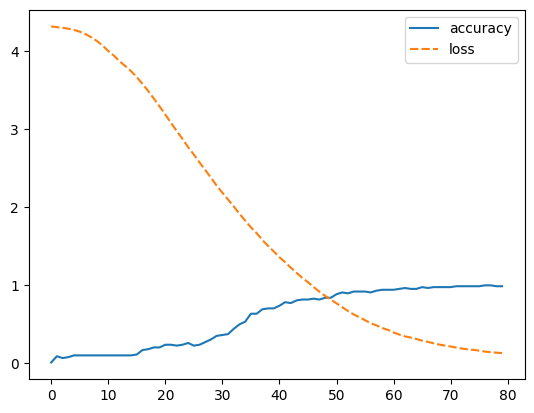

In [4]:
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Lambda


data = """Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance."""
# data
# file_name = 'textfile.txt'

# # Read the file content
# with open(file_name, 'r') as file:
    # data = file.read()

# Print the first few lines to verify
print(data)


sentences = data.split('.')
sentences


clean_sent=[]
for sentence in sentences:
    # if sentence=="":
    #     continue
    # sentence = re.sub('[^A-Za-z0-9]+', ' ', (sentence))
    # sentence = re.sub(r'(?:^| )\w (?:$| )', ' ', (sentence)).strip()
    sentence = sentence.lower()
    clean_sent.append(sentence)

clean_sent


tokenizer = Tokenizer()
tokenizer.fit_on_texts(clean_sent)
sequences = tokenizer.texts_to_sequences(clean_sent)
print(sequences)


index_to_word=tokenizer.index_word
word_to_index=tokenizer.word_index
print(index_to_word,"\n")
print(word_to_index)
# print(word_to_index)


vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)
emb_size = 10
context_size = 2

contexts = []
targets = []
# [1 2 3]
# 2 3 4
# 2 3 4
# 4 5 6
# 2

for sequence in sequences:
  # mumbai is a xyz fun city
    for i in range(context_size, len(sequence) - context_size):
        target = sequence[i]
        context = [sequence[i - 2], sequence[i - 1], sequence[i + 1], sequence[i + 2]]
#         print(context)
        contexts.append(context)
        targets.append(target)
print(contexts, "\n")
print(targets)


#printing features with target
for i in range(5):
    words = []
    target = index_to_word.get(targets[i])
    for j in contexts[i]:
        words.append(index_to_word.get(j))
    print(words," -> ", target)


# Convert the contexts and targets to numpy arrays
X = np.array(contexts)
Y = np.array(targets)
print(X)
print(Y)


model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=emb_size, input_length=2*context_size),
    Lambda(lambda x: tf.reduce_mean(x, axis=1)),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(vocab_size, activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X, Y, epochs=80)


import seaborn as sns
sns.lineplot(model.history.history)


print("'Deep learning (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised. Deep-learning architectures such as deep neural networks, deep belief networks, deep reinforcement learning, recurrent neural networks, convolutional neural networks and Transformers have been applied to fields including computer vision, speech recognition, natural language processing, machine translation, bioinformatics, drug design, medical image analysis, climate science, material inspection and board game programs, where they have produced results comparable to and in some cases surpassing human expert performance.")


# test model: select some sentences from above paragraph
test_sentenses = [
    "known as structured learning",
    "transformers have applied to",
    "where they produced results",
    "cases surpassing expert performance"
]


for sent in test_sentenses:
    test_words = sent.split(" ")
#     print(test_words)
    x_test =[]
    for i in test_words:
        x_test.append(word_to_index.get(i))
    x_test = np.array([x_test])
    print(x_test.shape)
    # x_test = np.array(x_test)
    # print(x_test)

    pred = model.predict(x_test)
    # print(pred)
    # print(pred.size)
    pred1 = np.argmax(pred[0])
    print("pred ", test_words, "\n=", index_to_word.get(pred1),"\n\n")






